In [1]:
# from Jake VanderPlas youtbue https://www.youtube.com/watch?v=_ZEWDGpM-vM
# https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k
# http://www.seattle.gov/transportation/bikecounter_fremont.htm

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [27]:
from jupyterworkflow.data import get_fremont_data

In [28]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


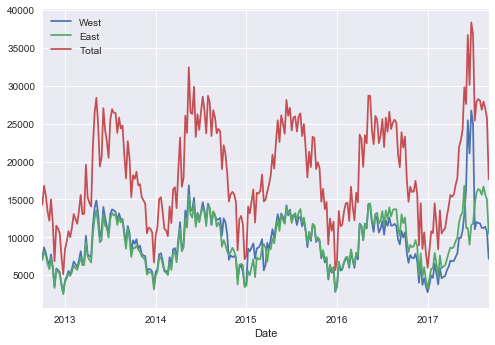

In [29]:
data.resample('W').sum().plot();

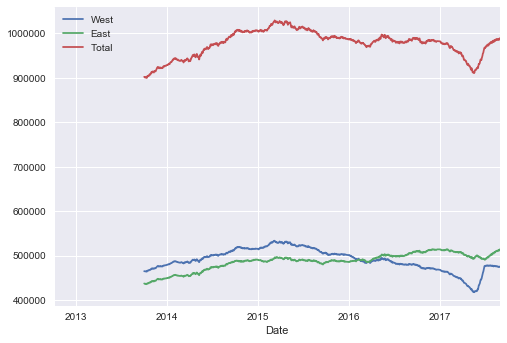

In [30]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 1059460.05)

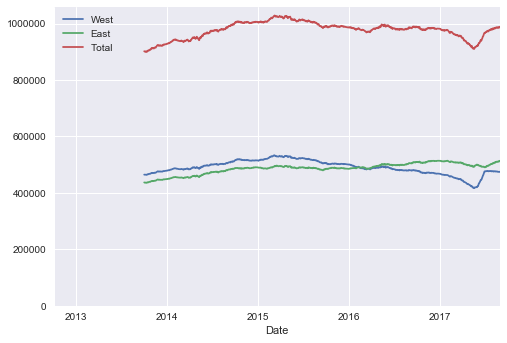

In [31]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

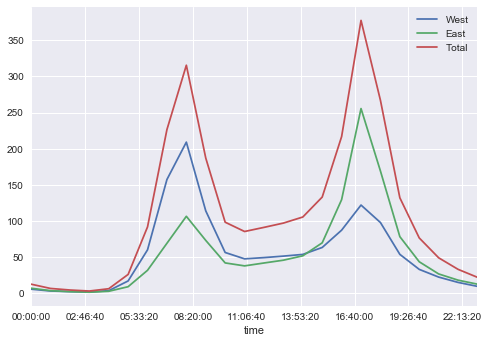

In [32]:
data.groupby(data.index.time).mean().plot()

In [33]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


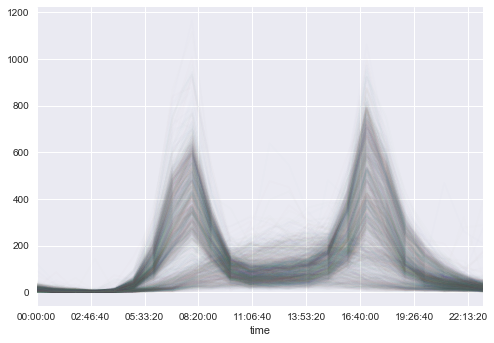

In [34]:
pivoted.plot(legend=False, alpha=0.01)

In [35]:
get_fremont_data??